## NAME: Parth Bhalani
## Student ID: 23005402

## Problem 1 (10 points):

#### Using matplotlib, plot the two points (x1,y1)=(3,5) and (x2,y2)=(7,2) and the line that passes through both points. The line must continue to the edges of the plot. (I.e., it is not just a line segment connecting the points.)

In [26]:
# Import necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

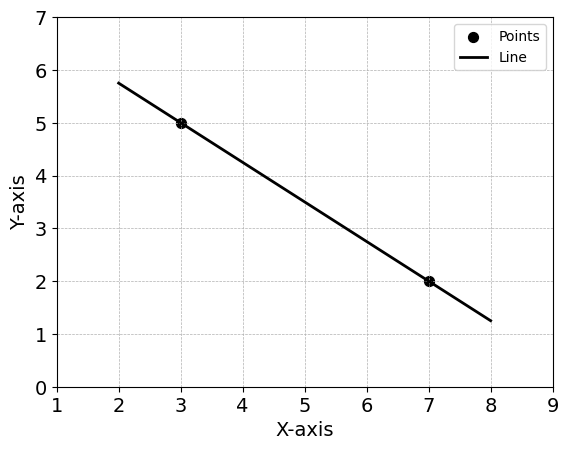

In [2]:
# The coordinates of the two points as specified above
x1, y1 = 3, 5
x2, y2 = 7, 2 

# Line equation is (y= mx + c)
x_line = [min(x1,x2) - 1, max(x1,x2) + 1]  # generate X value for the Line

# For Y value first we generate m and c value
m = (y2 - y1) / (x2 - x1)
b = y1 - m * x1
y_line = [m * x + b for x in x_line]  # generate Y value for the line 


# plot the points 
plt.scatter([x1, x2],[y1, y2], color='black', s=50, label= 'Points')

# plot the line 
plt.plot(x_line, y_line, color = 'black', linewidth=2, label='Line')

# Set plot limits to ensure the line continues to the edges
plt.xlim(min(x1, x2) - 2, max(x1, x2) + 2)
plt.ylim(min(y1, y2) - 2, max(y1, y2) + 2)

# Add labels and legend
plt.xlabel('X-axis', fontsize=14)
plt.ylabel('Y-axis', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()

# Add a coordinate grid
plt.grid(True, linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


### Problem 2 (10 points):

Load data from the following parquet file (URL below) into Python. Make nice plots presenting the data as fully as possible.

https://star.herts.ac.uk/~kuhn/DHV/exercises_problem2.parquet

I have deliberately not included more information about the content of the dataset or how best to present the data because this is up to you to figure out! You will be marked on your creativity and the appropriateness of your data presentation choices. To fully present the data, you may need to make multiple plots.

In [3]:
# First we import the data from the link above
df = pd.read_parquet("Data/exercises_problem2.parquet", engine='pyarrow')
df.head()


,var1,var2,var3,class
0,2.220386,3.088938,5.309324,1
1,-1.112359,1.838144,0.725785,0
2,-0.687695,1.747231,1.059535,0
3,-2.875016,1.718303,-1.156714,0
4,-2.010930,1.327895,-0.683035,0


In [4]:
df.info() # Some basic information about datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var1    400 non-null    float64
 1   var2    400 non-null    float64
 2   var3    400 non-null    float64
 3   class   400 non-null    int16  
dtypes: float64(3), int16(1)
memory usage: 10.3 KB


In [5]:
df.describe()   # Basic statistics of datasets

,var1,var2,var3,class
count,400.000000,400.000000,400.000000,400.000000
mean,3.469246,2.576392,6.045638,0.627500
std,3.811159,0.533500,4.219296,0.484076
min,-5.577154,0.444386,-5.132768,0.000000
25%,0.068847,2.346191,2.419225,0.000000
50%,4.968903,2.708548,7.961119,1.000000
75%,7.025826,2.951366,9.840901,1.000000
max,9.425215,3.471373,12.048517,1.000000


## 1. Histogram 

In [29]:
# Histogram function for a DataFrame 
def histrogram(df):
    # Create subplots in a 2x2 grid
    fig, axes = plt.subplots(2,2,figsize=(12, 10)) 
    # Set the main title for the entire set of subplots
    fig.suptitle('Histograms for Each Column', fontsize=16)
    # Flatten the 2D array of subplots into a 1D array for easy iteration
    axes = axes.flatten()
    
    # Iterate through each column in the DataFrame
    for i, column in enumerate(df.columns):
        # Plot a histogram for the current column
        axes[i].hist(df[column], bins=20, edgecolor='black')
        # Set title, x-axis label, and y-axis label for each subplot
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
    # Adjust layout to prevent subplot overlapping
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    # Display the plots
    plt.show()
    return

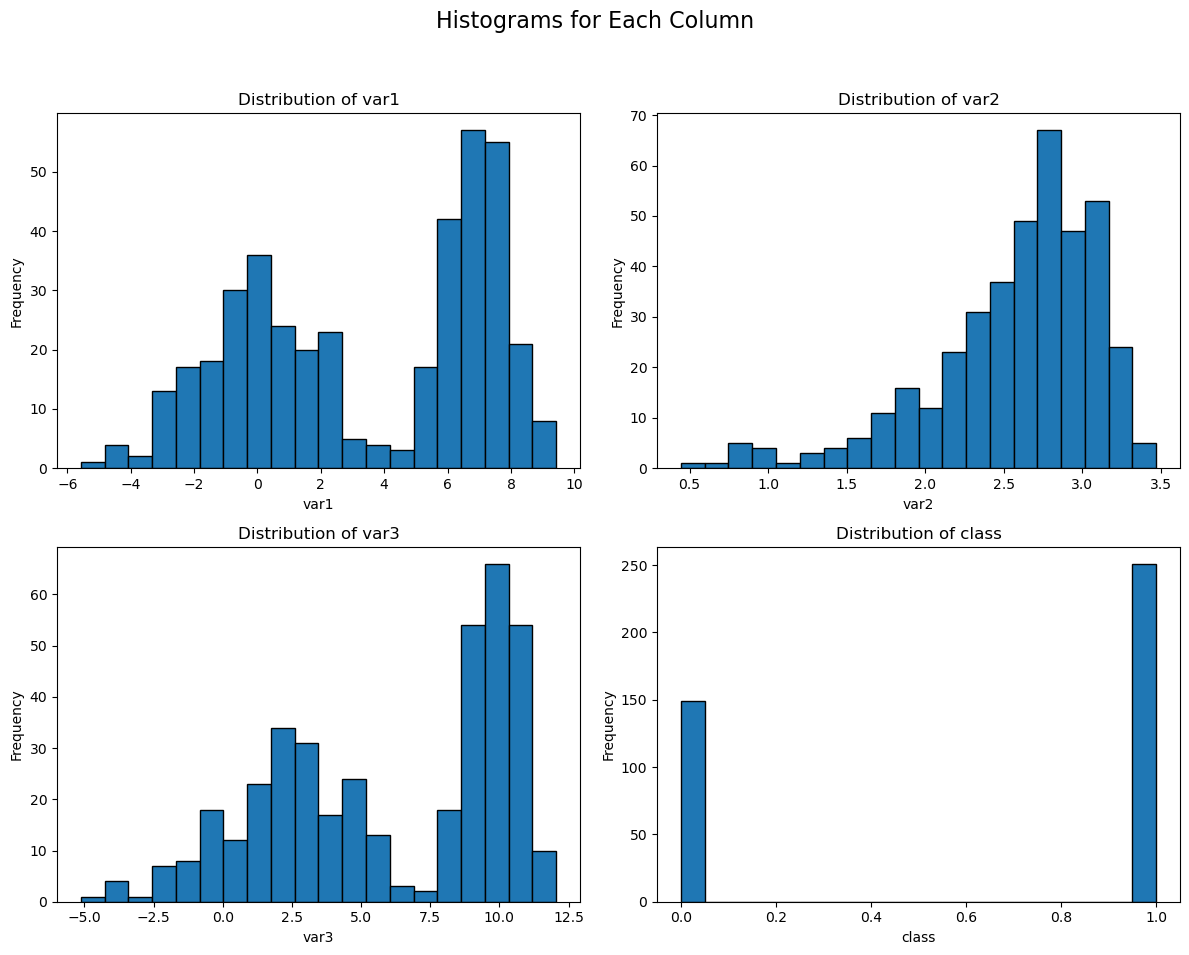

In [30]:
histrogram(df)

Conclusion: var1, var2, and var3 data has Right Skewed.

# 2.Box Plot

In [15]:
# Box plot function for a DataFrame
def box_plot(df):
    # Create a figure with a specified size
    plt.figure(figsize=(12,8))
    
    # Generate a box plot for all numeric variables in the DataFrame
    sns.boxplot(data=df)  
    plt.ylabel("values") # Label the y-axis 
    plt.title("Box plots for Numeric Variables") # Set the title of the plot
    plt.show() # Display the plot
    return

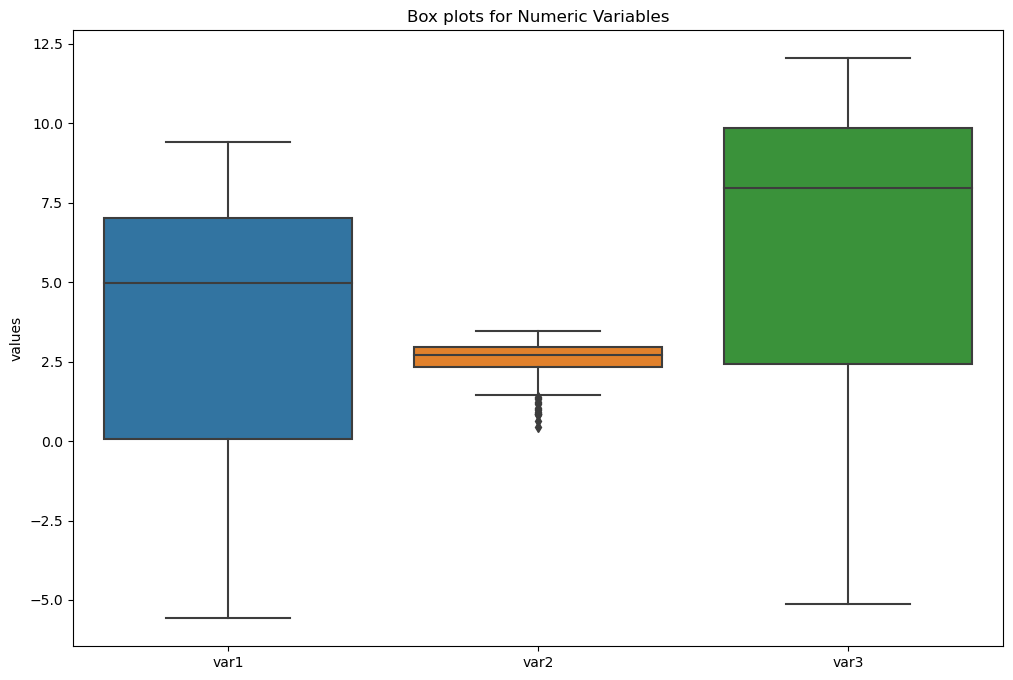

In [16]:
box_plot(df.drop('class', axis=1)) # Remove class columns from the datasets

Conclusion : Var 2 have the outliers in the data.

# 3. 3D scatter plot

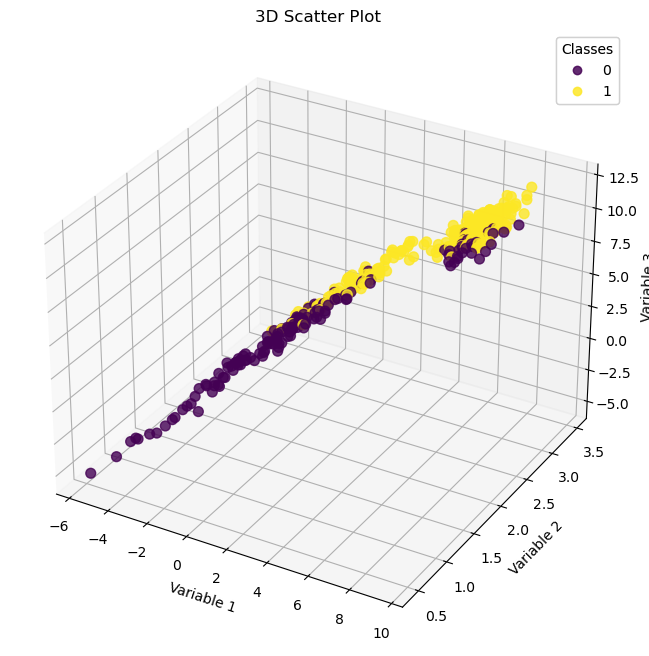

In [20]:
# Create a figure with a specified size
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# scatter plot
scatter = ax.scatter(df['var1'], df['var2'], df['var3'], c=df['class'], cmap='viridis', s=50, alpha=0.8)

# Customize plot
ax.set_xlabel('Variable 1')
ax.set_ylabel('Variable 2')
ax.set_zlabel('Variable 3')
ax.set_title('3D Scatter Plot')

# Add colorbar
legend = ax.legend(*scatter.legend_elements(),title='Classes')
ax.add_artist(legend)

plt.show()  #Display the plot

Conclusion : Variable 1 , Variable 2 and Variable 3 distribution with relate to the last column Class.

# 4. Pair Plot

<Figure size 1000x800 with 0 Axes>

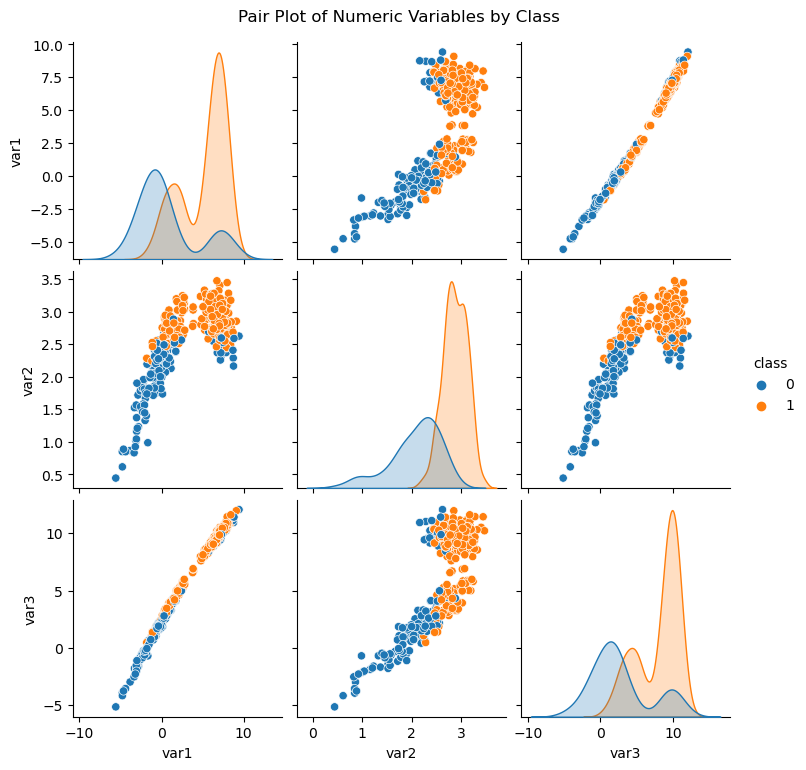

In [24]:
# Create a figure with a specified size
fig = plt.figure(figsize=(10,8))

# Generate a pair plot using Seaborn
sns.pairplot(df, hue='class')
# Set the title for the pair plot
plt.suptitle('Pair Plot of Numeric Variables by Class', y=1.02)

plt.show() # Display the plot

## 5.Heat Map

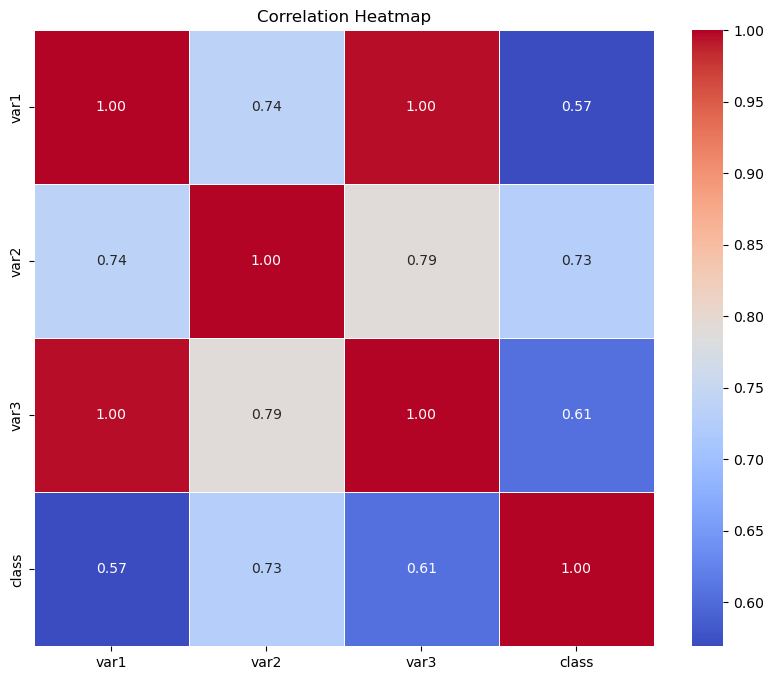

In [25]:
# Assuming df is your DataFrame
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

#Set the title of the heatmap
plt.title('Correlation Heatmap') 

plt.show() # Display the Plot